# rcParamsを使って日本語表記を綺麗に出力する 
[参照URL](https://matplotlib.org/3.1.0/gallery/text_labels_and_annotations/font_family_rc_sgskip.html)

*与えられたフォントスタイルに対して、どのフォントファミリーをピックアップするかを明示的に設定することができます（例：「serif」、「sans-serif」、「monospace」）。*

*以下の例では、sans-serifのフォントスタイルに対して1つのフォントファミリー（Tahoma）だけを許可しています。デフォルトのフォントファミリーは、font.family rc パラメータで指定します* 

### 実験：Docker'font.family'を'IPAexGothic'で試してみる  
[参考URL1](http://oyaryo.blogspot.com/2018/03/matplotlib.html)  
[参考URL2](https://zenn.dev/pesuchin/articles/c1bc57a6bfa13fa466fb)

Duplicate key in file PosixPath('/opt/conda/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 767 ('font.family : IPAexGothic')


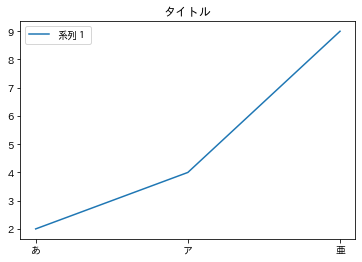

In [1]:
from matplotlib import rcParams
rcParams['font.family'] = 'IPAexGothic'
import matplotlib.pyplot as plt

x = ['あ', 'ア','亜']
y = [2,4,9]
fig, ax = plt.subplots()
ax.plot(x,y,label='系列１')
ax.set_title('タイトル') #ここに英数字、を入れたら出力できた。半角カタカナは不可
ax.legend()

plt.show()

In [2]:
import matplotlib
print(matplotlib.matplotlib_fname()) #設定ファイルを表示（matplotlibrcは後で作ります）
print(matplotlib.rcParams['font.family']) #現在使用しているフォントを表示
print(matplotlib.get_configdir()) #設定ディレクトリを表示
print(matplotlib.get_cachedir()) #キャッシュディレクトリを表示

/opt/conda/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc
['IPAexGothic']
/root/.config/matplotlib
/root/.cache/matplotlib


↑最後にキャッシュは削除する

### Chapter-1のデータを使って出力

データの読み込み

In [13]:
import pandas as pd
data = pd.read_csv("/opt/100knock-process-visualization/chapter-1/data/22_shizuoka_all_20210331.csv",encoding = "shift-jis", dtype = object)

ヘッダの読み込み

In [14]:
mst = pd.read_csv("/opt/100knock-process-visualization/chapter-1/data/mst_column_name.txt",encoding = "shift-jis",sep ='\t')

ヘッダの追加

In [15]:
columns = mst.column_name_en.values
data.columns = columns
data.head()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
1,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
2,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
3,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0
4,6,1000020222135,01,1,2020-09-29,2015-10-05,掛川市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Kakegawa City,Shizuoka,"1-1-1 Nagaya, Kakegawa shi",NaN,カケガワシ,0


市町村別の法人数の可視化

In [16]:
tmp = data.groupby('cityName').size()
tmp.head(10)

cityName
三島市      3590
下田市       930
伊東市      3255
伊豆の国市    1443
伊豆市      1162
周智郡森町     498
富士宮市     3549
富士市      7288
島田市      2285
御前崎市      912
dtype: int64

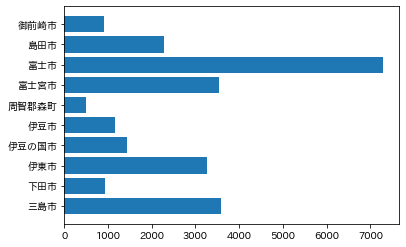

In [17]:
from matplotlib import rcParams
rcParams['font.family'] = 'IPAexGothic'
import matplotlib.pyplot as plt
%matplotlib inline

x = tmp[:10].index
y = tmp[:10].values
plt.barh(x, y)

plt.show()


ローカル：'Hiragino Sans'  
Docker:'IPAexGothic'  
は日本語表記できることがわかった。